In [1]:
import torch
import numpy as np
from ANN_model import Features12_NN, Features12_NN2, Features7_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 128
RANDOM_STATE = 42
CLEANED = True

if CLEANED:
    X = np.load('Numeric_feature_dataset/features12_train_cleaned.npy')
    y = np.load('Numeric_feature_dataset/target_train_cleaned.npy')
    print('Using cleaned data')
else:
    X = np.load('Numeric_feature_dataset/features12_train.npy')
    y = np.load('Numeric_feature_dataset/target_train.npy')

X = np.delete(X, [10, 11, 6, 0, 1], axis=1)

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Using cleaned data
Total num of data: 11750


In [3]:
model = Features7_NN(in_features=7)
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=1000, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.001)

[Epoch 1/1000] train_loss: 0.052632, test_loss: 0.024203 | train_mape: 35.6808, test_mape: 26.1965
[Epoch 2/1000] train_loss: 0.024477, test_loss: 0.023921 | train_mape: 27.4127, test_mape: 25.4839
[Epoch 3/1000] train_loss: 0.023633, test_loss: 0.021088 | train_mape: 26.8449, test_mape: 25.9334
[Epoch 4/1000] train_loss: 0.021511, test_loss: 0.020304 | train_mape: 25.4242, test_mape: 25.9585
[Epoch 5/1000] train_loss: 0.019773, test_loss: 0.015819 | train_mape: 24.4921, test_mape: 22.3978
[Epoch 6/1000] train_loss: 0.014013, test_loss: 0.010814 | train_mape: 20.3174, test_mape: 17.4999
[Epoch 7/1000] train_loss: 0.011901, test_loss: 0.010475 | train_mape: 18.7291, test_mape: 17.2308
[Epoch 8/1000] train_loss: 0.011524, test_loss: 0.009853 | train_mape: 18.3795, test_mape: 16.1562
[Epoch 9/1000] train_loss: 0.010189, test_loss: 0.010255 | train_mape: 17.3761, test_mape: 17.4403
[Epoch 10/1000] train_loss: 0.010047, test_loss: 0.009375 | train_mape: 17.2744, test_mape: 16.5030
[Epoch 11

In [4]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/features7_model3.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

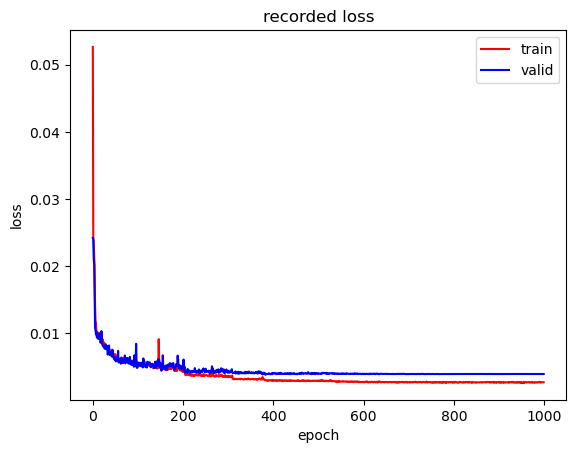

In [5]:
loss_plot(trainloss, testloss)

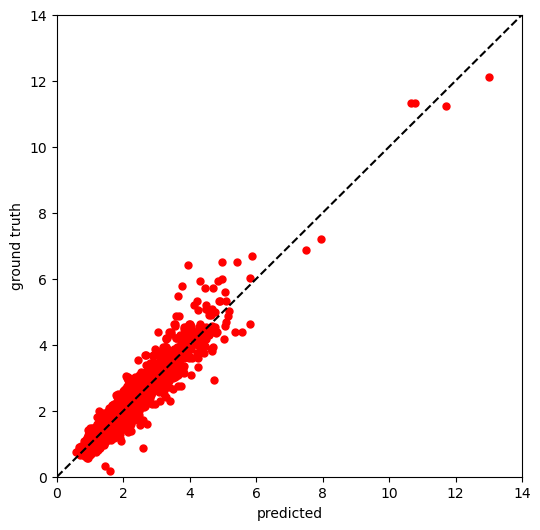

In [6]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

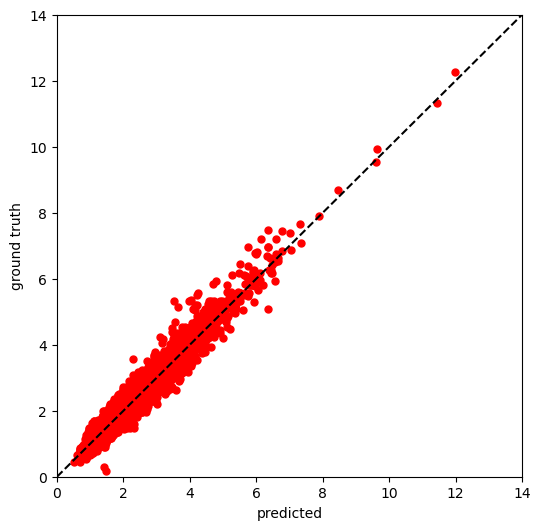

In [7]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)